# Data Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport

from utils.preprocessing import load_entities, load_tokens, get_token_dict, process_entities_data

%matplotlib inline

/home/codespace/.python/current/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Preprocessing

In [2]:
entities = load_entities('data/entities.json')
tokens = load_tokens('data/tokens.yml')
token_dict = get_token_dict(tokens)

In [3]:
df = process_entities_data(token_dict, entities)

 53%|█████▎    | 644/1218 [00:00<00:00, 2716.95it/s]

Error processing entry:  L. et Cher
Invalid line format: Expected even number of elements
Error processing entry:  L et Ch
Invalid line format: Expected even number of elements
Error processing entry: L. et Ch.
Invalid line format: Expected even number of elements
Error processing entry: Cher
Invalid line format: Expected even number of elements


100%|██████████| 1218/1218 [00:00<00:00, 2634.43it/s]

Error processing entry: $$
Invalid line format: Expected even number of elements
Error processing entry: +
Invalid line format: Expected even number of elements
Error processing entry: Mauplin ⒻPierre ⓂJournalier ⒽChef de ménage Ⓐ43 ⒸHomme marié Ⓘidem
Invalid line format: Expected even number of elements


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Summarize dataset:  77%|███████▋  | 17/22 [00:01<00:00, 11.00it/s, Missing diagram heatmap]           /home/codespace/.python/current/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
/home/codespace/.python/current/lib/python3.10/site-packages/ydata_profiling/model/missing.py:78: UserWarning: There was an attempt to generate the Heatmap missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Heatmap": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: '--'')
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 65.98it/s]


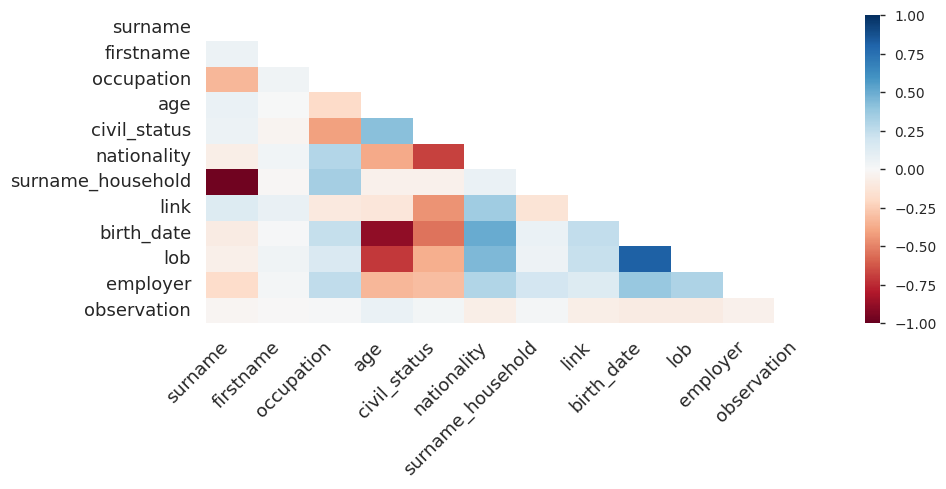

In [4]:
profile = ProfileReport(df, title="Profiling Report")
profile.to_file("data/output/entities_profiling_report.html")

In [5]:
df.to_csv("data/output/entities_processed.csv", index=False)

## Remove outliers

In [6]:
# change the data type of 'age' and 'birth_date' to int and handle the missing values
# ignore the errors with 'coerce' to convert the invalid values to NaN 

df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['birth_date'] = pd.to_numeric(df['birth_date'], errors='coerce')

<Axes: >

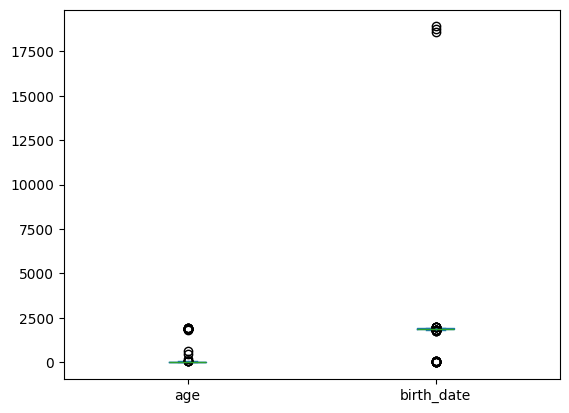

In [7]:
# plot outliers in df

df.plot(kind='box')

In [8]:
# remove outliers in 'age' and 'birth_date' and replace them with median

df['age'] = df['age'].apply(lambda x: pd.NA if x < 0 or x > 100 else x)
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['birth_date'] = df['birth_date'].apply(lambda x: pd.NA if x < 1000 or x > 2000 else x)
df['birth_date'] = df['birth_date'].astype('Int64')

In [9]:
# Replace specific values
df['occupation'] = df['occupation'].replace(['néant', 'sans', 'sans profes.', 
                                             's.p', 's.p.', 'sp', 's p', 'S.P',
                                             's. prof', 's. profes', 's. profess', 's. profess.', 's. profession', 's. prof.'], 'sans profession')
df['occupation'] = df['occupation'].replace(['cult', 'cult r', 'cultiv'], 'cultivateur')
df['link'] = df['link'].replace(['sa f', 'sa fe', 'sa fme'], 'sa femme')
df['link'] = df['link'].replace(['chef de mge', 'chef de m'], 'chef de ménage')
df['surname_household'] = df['surname_household'].replace(['vve', 'Veuve', 'Vve'], 'veuve')

# Replace 'idem' with NaN in all columns
df = df.replace('idem', np.nan)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25074 entries, 0 to 25073
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   surname            18490 non-null  object 
 1   firstname          24914 non-null  object 
 2   occupation         12483 non-null  object 
 3   age                15920 non-null  float64
 4   civil_status       10704 non-null  object 
 5   nationality        8865 non-null   object 
 6   surname_household  5636 non-null   object 
 7   link               18597 non-null  object 
 8   birth_date         7320 non-null   Int64  
 9   lob                5858 non-null   object 
 10  employer           2306 non-null   object 
 11  observation        514 non-null    object 
dtypes: Int64(1), float64(1), object(10)
memory usage: 2.3+ MB


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Summarize dataset:  81%|████████  | 21/26 [00:02<00:00,  7.46it/s, Missing diagram heatmap]           /home/codespace/.python/current/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
/home/codespace/.python/current/lib/python3.10/site-packages/ydata_profiling/model/missing.py:78: UserWarning: There was an attempt to generate the Heatmap missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Heatmap": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: '--'')
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 99.12it/s]


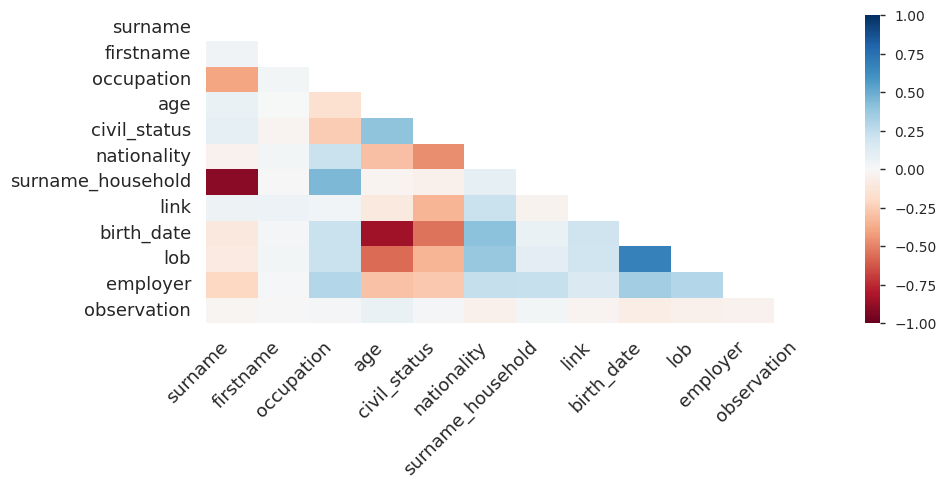

In [11]:
profile = ProfileReport(df, title="Profiling Report After Cleaning")
profile.to_file("data/output/entities_profiling_report_after_cleaning.html")

In [12]:
df.to_csv("data/output/entities_processed_and_cleaned.csv", index=False)

In [13]:
df.to_pickle("data/output/entities_processed_and_cleaned.pkl")

## EDA

### Missing values

Missing values are displayed in dark on the plot below.

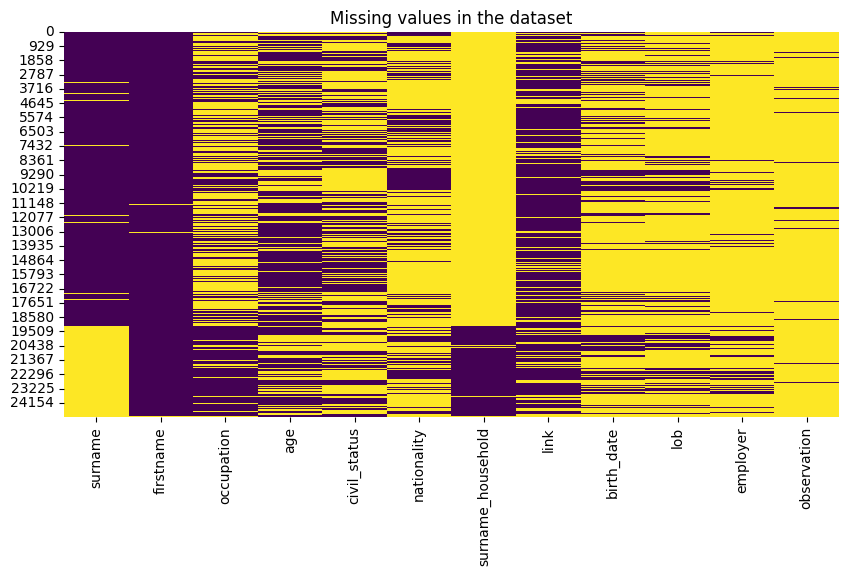

In [14]:
# plot missing values in the dataset

plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing values in the dataset')
plt.show()

### Most occurring entries

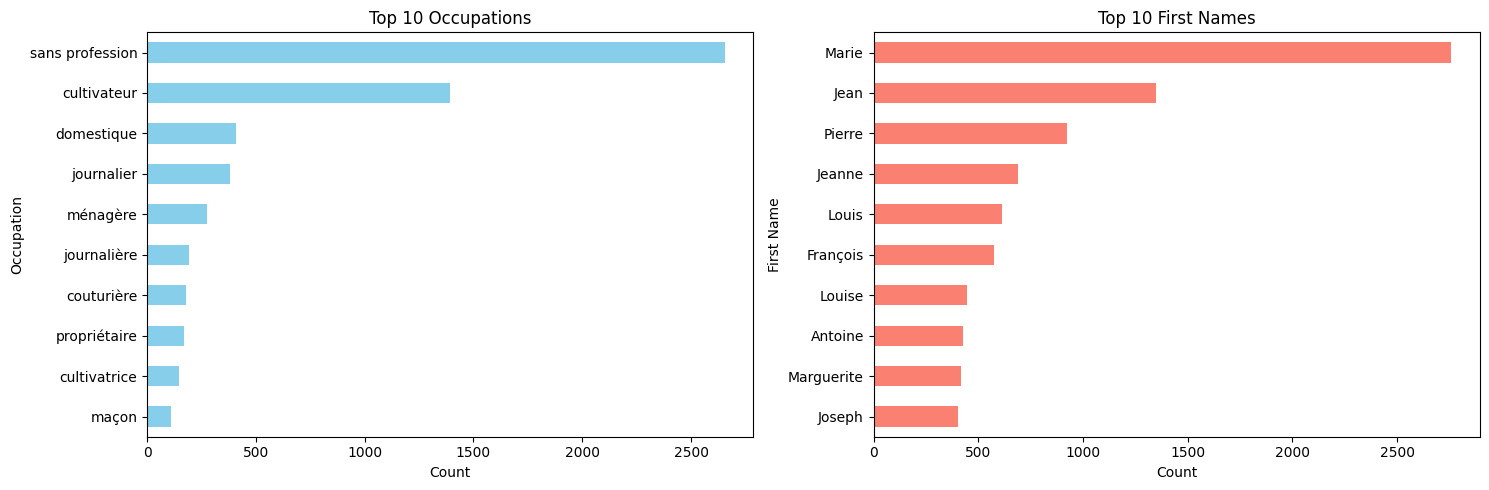

In [15]:
# plot top 10 occupations and top 10 first names in the dataset in horizontal bar plots

# top 10 occupations
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
# sort the values and plot the top 10 occupations
df['occupation'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Top 10 Occupations')
plt.xlabel('Count')
plt.ylabel('Occupation')

# top 10 first names
plt.subplot(1, 2, 2)
df['firstname'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh', color='salmon')
plt.title('Top 10 First Names')
plt.xlabel('Count')
plt.ylabel('First Name')

plt.tight_layout()
plt.show()

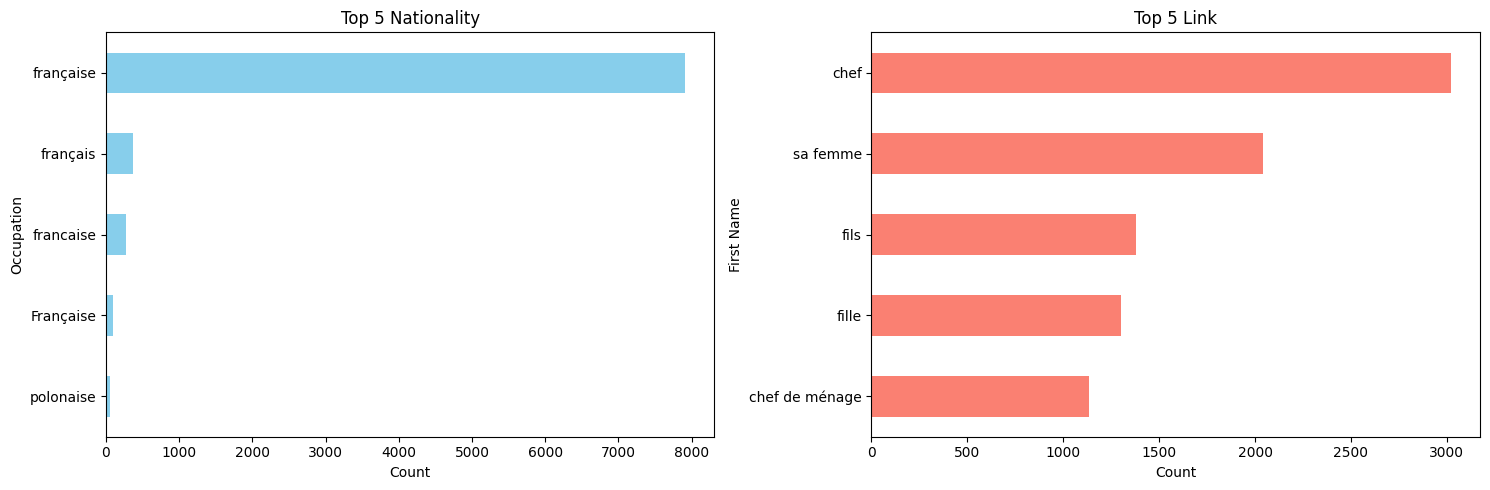

In [16]:
# plot top 5 nationality and link

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
df['nationality'].value_counts().head(5).sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Top 5 Nationality')
plt.xlabel('Count')
plt.ylabel('Occupation')

plt.subplot(1, 2, 2)
df['link'].value_counts().head(5).sort_values(ascending=True).plot(kind='barh', color='salmon')
plt.title('Top 5 Link')
plt.xlabel('Count')
plt.ylabel('First Name')

plt.tight_layout()
plt.show()

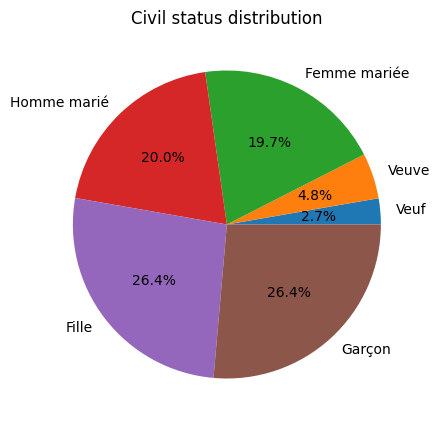

In [17]:
# plot civil_status pie chart

plt.figure(figsize=(10, 5))
df['civil_status'].value_counts().sort_values().plot.pie(autopct='%1.1f%%')
plt.title('Civil status distribution')
plt.ylabel('')
plt.show()
